In [19]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [20]:
diab=pd.read_csv("diabetes.csv")

In [28]:
diab.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [22]:
#split dataset in features and target variable
#The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding.
#What is target variable in logistic regression?
#Logistic regression can be used only with two types of target variables: A categorical target variable that has exactly two categories (i.e., a binary or dichotomous variable). A continuous target variable that has values in the range 0.0 to 1.0 representing probability values or proportions.
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure','Insulin', 'Age','Glucose','BMI','DiabetesPedigreeFunction']
x = diab[feature_cols] # Features
y = diab.Outcome # Target variable

In [24]:
# split X and y into training and testing sets
#Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.
#0.25 means that 25% data is assigned for testing and rest 75 is assigned to training random=0 to select randomly row vize
from sklearn.model_selection import train_test_split #to split the data intp training and testing parts
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data  
#logreg.fit(x,y)  after training  and testing put the whole data
logreg.fit(x_train,y_train)  

#y_pred=logreg.predict(x) for all data
y_pred=logreg.predict(x_test)
print(y_pred)

In [37]:
##Model Evaluation using Confusion Matrix
#A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
#Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.

array([[118,  12],
       [ 24,  38]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

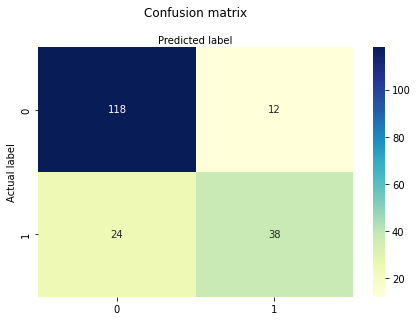

In [47]:
#Now plotting the results
classnames=[0,1]
fig,ax=plt.subplots()
tick_marks=np.arange(len(classnames))
plt.xticks(tick_marks, classnames)
plt.yticks(tick_marks, classnames)

import seaborn as sns

#annot: If True, write the data value in each cell. fmt: String formatting code to use when adding annotations. linewidths: Width of the lines that will divide each cell.
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1) #y=1.1 is used to give 1.1 gap from y axis in a horizontal manner
plt.ylabel('Actual label',x=1.1 )#x=1.1 is used to give 1.1 gap from x axis in a vertical manner
plt.xlabel('Predicted label')

In [ ]:
Confusion Matrix Evaluation Metrics
Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
accuracy is the measurement used to determine which model is best at identifying relationships and patterns between variables in a dataset based on the input, or training, data.
Precision refers to the number of true positives divided by the total number of positive predictions (i.e., the number of true positives plus the number of false positives).
The recall is the measure of our model correctly identifying True Positives. 

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8125
Precision: 0.76
Recall: 0.6129032258064516


C:\Users\Aamash\Desktop\phython course\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

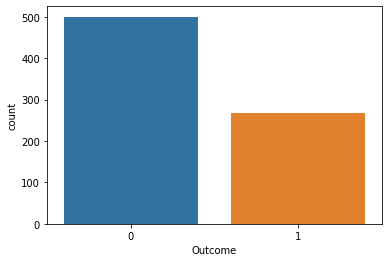

In [49]:
sns.countplot(y,data=diab)

In [ ]:
# to convert a catgorical data to binary 0 1

